<a href="https://colab.research.google.com/github/abhishekdconviction/100-Days-Of-ML-Code/blob/master/Pandas_data_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import files
import io

In [ ]:
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded["data.csv"]))

In [ ]:
data.head()

,Height,Weight,Eye,Species
0,88.9,48.3,Brown,Dog
1,90.2,47.4,Brown,Dog
2,82.7,44.8,Blue,Dog
3,81.4,48.2,Brown,Dog
4,83.5,39.9,Brown,Dog


In [ ]:
data = data.set_index("Species")

In [ ]:
data.head()

,Height,Weight,Eye
Species,,,
Dog,88.9,48.3,Brown
Dog,90.2,47.4,Brown
Dog,82.7,44.8,Blue
Dog,81.4,48.2,Brown
Dog,83.5,39.9,Brown


In [ ]:
data.Height.map(lambda x:x/12m)

Species
Dog    7.408333
Dog    7.516667
Dog    6.891667
Dog    6.783333
Dog    6.958333
Cat    6.366667
Cat    6.858333
Cat    6.758333
Cat    6.658333
Cat    6.866667
Name: Height, dtype: float64

In [ ]:
data[['Height','Eye']]

,Height,Eye
Species,,
Dog,88.9,Brown
Dog,90.2,Brown
Dog,82.7,Blue
Dog,81.4,Brown
Dog,83.5,Brown
Cat,76.4,Blue
Cat,82.3,Blue
Cat,81.1,Blue
Cat,79.9,Blue


In [ ]:
data.index

Index(['Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat'], dtype='object', name='Species')

In [ ]:
#import requisite packages
import pandas as pd
import numpy as np 
import os
import io
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
from sklearn.datasets import load_boston

In [ ]:
#upload dataset
uploaded = files.upload()

Saving sales_subset.csv to sales_subset (1).csv


In [ ]:
sales = pd.read_csv(io.BytesIO(uploaded["sales_subset.csv"]))

In [ ]:
sales.head()
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10774 non-null  int64  
 1   store                 10774 non-null  int64  
 2   type                  10774 non-null  object 
 3   department            10774 non-null  int64  
 4   date                  10774 non-null  object 
 5   weekly_sales          10774 non-null  float64
 6   is_holiday            10774 non-null  bool   
 7   temperature_c         10774 non-null  float64
 8   fuel_price_usd_per_l  10774 non-null  float64
 9   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 768.2+ KB


In [ ]:
mask =~sales.columns.str.contains("unnamed",case =False)
sales = sales.loc[:,mask]
sales.head(20)
#sales.is_holiday.unique()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808
5,1,A,1,2010-07-02,16333.14,False,27.172222,0.705076,7.787
6,1,A,1,2010-08-06,17508.41,False,30.644444,0.693980,7.787
7,1,A,1,2010-09-03,16241.78,False,27.338889,0.680772,7.787
8,1,A,1,2010-10-01,20094.19,False,22.161111,0.687640,7.838
9,1,A,1,2010-11-05,34238.88,False,14.855556,0.710359,7.838


In [ ]:
sales.columns

Index(['store', 'type', 'department', 'date', 'weekly_sales', 'is_holiday',
       'temperature_c', 'fuel_price_usd_per_l', 'unemployment'],
      dtype='object')

In [ ]:
sales.type = sales.type.astype("category")

In [ ]:

sales.type = sales['type'].replace(['A','B'],[0,1])
sales.type = sales['type'].astype("int64")
sales.is_holiday = sales['is_holiday'].replace(['Fales','True'],[0,1]).astype("int64")

In [ ]:
sales_num = sales.select_dtypes(["int64","float64"])

In [ ]:
sales_num.head()

,store,type,department,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,0,1,24924.50,0,5.727778,0.679451,8.106
1,1,0,1,21827.90,0,8.055556,0.693452,8.106
2,1,0,1,57258.43,0,16.816667,0.718284,7.808
3,1,0,1,17413.94,0,22.527778,0.748928,7.808
4,1,0,1,17558.09,0,27.050000,0.714586,7.808


In [ ]:
sales_department = sales.groupby('department')['weekly_sales'].mean()

In [ ]:
len(sales_department)

80

In [ ]:
sales_department.index.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [ ]:
sales_department = sales_department.reset_index()

<Figure size 1120x480 with 0 Axes>

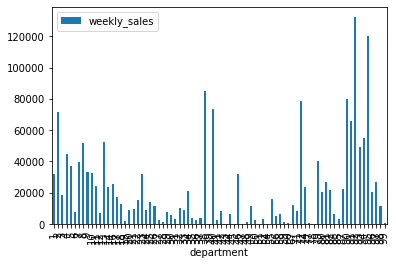

In [ ]:
plt.figure(figsize=(14,6), dpi =80)
sales_department.plot(x="department",y="weekly_sales", kind="bar")

In [ ]:
sales_department.head()

,department,weekly_sales
0,1,32052.467153
1,2,71380.022778
2,3,18278.390625
3,4,44863.253681
4,5,37189.000000


In [ ]:
sales.pivot_table(values ="weekly_sales", index ="department", aggfunc=['mean','median'])

,mean,median
,weekly_sales,weekly_sales
department,,
1,32052.467153,25478.905
2,71380.022778,70001.020
3,18278.390625,13788.100
4,44863.253681,44011.535
5,37189.000000,30943.785
...,...,...
95,120029.480069,113995.825
96,20337.607681,23935.495


In [ ]:
temp = files.upload()

Saving temperatures.csv to temperatures.csv


In [ ]:
temperature = pd.read_csv(io.BytesIO(temp['temperatures.csv']))
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16500 entries, 0 to 16499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  16500 non-null  int64  
 1   date        16500 non-null  object 
 2   city        16500 non-null  object 
 3   country     16500 non-null  object 
 4   avg_temp_c  16407 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 644.7+ KB


In [ ]:
mask1 = ~temperature.columns.str.contains("unnamed",case=False)
mask1

array([False,  True,  True,  True,  True])

In [ ]:
temperature = temperature.loc[:,mask1]
temperature['date'] = pd.to_datetime(temperature['date'])
temperature.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,city,country,avg_temp_c
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


In [ ]:
#temperature.pivot_table(values="avg_temp_c",index ="date",columns="country")
temperature['year'] = temperature['date'].dt.year

#temperature.head()
temp_year = temperature.pivot_table(values = "avg_temp_c",index="year", columns="country", aggfunc=["mean"])
temp_year.head()

In [ ]:
#temperature.head()
temp_year = temperature.pivot_table(values = "avg_temp_c",index="year", columns="country", aggfunc=["mean"])
temp_year.head()

mean                                                         \
country Afghanistan     Angola  Australia Bangladesh     Brazil      Burma   
year                                                                         
2000      15.822667  24.410333  15.943750  25.905250  23.612944  27.129417   
2001      15.847917  24.427083  16.017250  25.931250  23.990944  27.514417   
2002      15.714583  24.790917  15.904833  26.095000  24.261181  27.449833   
2003      15.132583  24.867167  15.788958  25.927417  24.003028  27.283167   
2004      16.128417  24.216167  15.805875  26.136083  23.594764  27.201167   

                                                   ...                        \
country    Canada     Chile      China   Colombia  ...      Syria     Taiwan   
year                                               ...                         
2000     5.905875  5.947750  12.679667  21.118208  ...  18.149250  23.095333   
2001     7.112833  6.414667  12.886667  21.619500  ...  18.750667  23.153417   
2002     6.748458  6.250250  13.233453  21.826125  ...  18.219000  23.447083   
2003     5.469042  6.773917  12.868349  21.787667  ...  18.203083  23.222417   
2004     5.652208  6.316333  13.168323  21.738250  ...  18.145917  22.930500   

                                                                   \
country   Tanzania   Thailand     Turkey   Ukraine United Kingdom   
year                                                                
2000     26.183500  27.523000  14.216750  8.818750      10.519167   
2001     26.275250  27.812833  15.351861  8.424000      10.180417   
2002     26.359083  27.981500  14.497500  8.874833      10.911417   
2003     26.692667  27.790000  14.332056  7.799083      10.809417   
2004     26.342250  27.797667  14.397139  8.323583      10.767833   

                                             
country United States    Vietnam   Zimbabwe  
year                                         
2000        12.567361  27.588917  20.283667  
2001        13.033444  27.831750  20.861000  
2002        13.071500  28.064750  21.079333  
2003        12.420750  27.827667  20.889167  
2004        12.628583  27.686583  20.307667  

[5 rows x 49 columns]

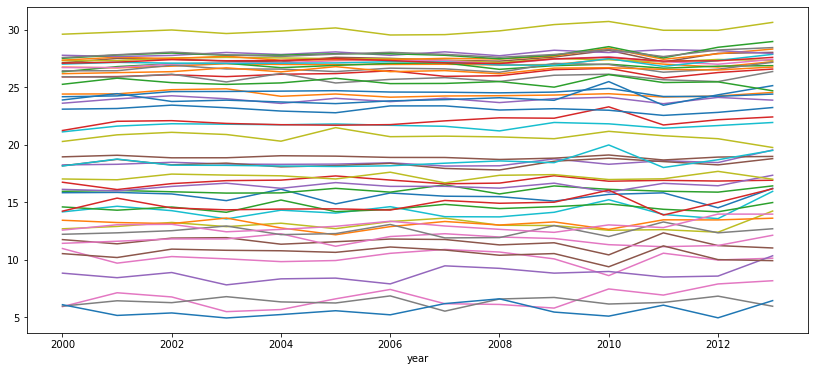

In [ ]:
plt.figure(figsize=(14,6))
y =temp_year[('mean')].index
x =temp_year[('mean')].columns
for c in x:
  temp_year[('mean')][c].plot()

In [ ]:
temperature.groupby('country')['avg_temp_c'].mean()

country
Afghanistan                           15.525756
Angola                                24.387659
Australia                             16.028104
Bangladesh                            26.164378
Brazil                                23.906030
Burma                                 27.514213
Canada                                 6.637158
Chile                                  6.345768
China                                 12.983107
Colombia                              21.649607
Congo (Democratic Republic Of The)    24.504963
Côte D'Ivoire                         26.971024
Dominican Republic                    26.852800
Egypt                                 22.044807
Ethiopia                              18.425378
France                                11.514274
Germany                               10.152421
India                                 26.633255
Indonesia                             27.408634
Iran                                  14.228701
Iraq                            

# Data Manipulation - Joining dataframes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})

In [12]:
df_melted = df.melt(value_vars=["A","B","C"],value_name = "values", var_name="aflatoon")

In [13]:
from google.colab import files
uploaded = files.upload()

Saving WorldBank_POP.csv to WorldBank_POP.csv
Saving WorldBank_GDP.csv to WorldBank_GDP.csv
Saving S&P500.csv to S&P500.csv


In [15]:
worldbank_pop = pd.read_csv('WorldBank_POP.csv')
type(worldbank_pop)

pandas.core.frame.DataFrame

In [18]:
worldbank_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    2640 non-null   object 
 1   Country Code    2640 non-null   object 
 2   Indicator Name  2640 non-null   object 
 3   Year            2640 non-null   int64  
 4   Pop             2622 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 103.2+ KB


In [19]:
worldbank_pop.head()

,Country Name,Country Code,Indicator Name,Year,Pop
0,Aruba,ABW,"Population, total",2010,101669.0
1,Afghanistan,AFG,"Population, total",2010,29185507.0
2,Angola,AGO,"Population, total",2010,23356246.0
3,Albania,ALB,"Population, total",2010,2913021.0
4,Andorra,AND,"Population, total",2010,84449.0


In [22]:
worldbank_pop['Indicator Name'].unique()
worldbank_pop['Year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [23]:
worldbank_pop = worldbank_pop.drop("Indicator Name",axis=1)

In [26]:
worldbank_pop.dropna(inplace=True)

In [27]:
worldbank_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2622 entries, 0 to 2639
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  2622 non-null   object 
 1   Country Code  2622 non-null   object 
 2   Year          2622 non-null   int64  
 3   Pop           2622 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 102.4+ KB


In [35]:
worldbank_gdp = pd.read_csv("WorldBank_GDP.csv")

In [36]:
worldbank_gdp.shape
worldbank_gdp.info()
worldbank_gdp.head()
worldbank_gdp['Indicator Name'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    40 non-null     object 
 1   Country Code    40 non-null     object 
 2   Indicator Name  40 non-null     object 
 3   Year            40 non-null     int64  
 4   GDP             40 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.7+ KB


array(['GDP (current US$)'], dtype=object)

In [37]:
worldbank_gdp= worldbank_gdp.drop("Indicator Name", axis =1)


In [43]:
worldbank_gdp.head()

,Country Name,Country Code,Year,GDP
0,China,CHN,2010,6.087160e+12
1,Germany,DEU,2010,3.417090e+12
2,Japan,JPN,2010,5.700100e+12
3,United States,USA,2010,1.499210e+13
4,China,CHN,2011,7.551500e+12


In [44]:
worldbank_inner_merge = worldbank_pop.merge(worldbank_gdp, on =['Country Code','Year'])

In [45]:
worldbank_merge = worldbank_pop.merge(worldbank_gdp)

In [50]:
worldbank_inner_merge.tail()

,Country Name_x,Country Code,Year,Pop,Country Name_y,GDP
43,United States,USA,2017,3.251471e+08,United States,1.948540e+13
44,China,CHN,2018,1.392730e+09,China,1.360820e+13
45,Germany,DEU,2018,8.292792e+07,Germany,3.996760e+12
46,Japan,JPN,2018,1.265291e+08,Japan,4.970920e+12
47,United States,USA,2018,3.271674e+08,United States,2.049410e+13


In [51]:
worldbank_merge.tail()

,Country Name,Country Code,Year,Pop,GDP
43,United States,USA,2017,3.251471e+08,1.948540e+13
44,China,CHN,2018,1.392730e+09,1.360820e+13
45,Germany,DEU,2018,8.292792e+07,3.996760e+12
46,Japan,JPN,2018,1.265291e+08,4.970920e+12
47,United States,USA,2018,3.271674e+08,2.049410e+13


In [53]:
worldbank_pop.columns, worldbank_gdp.columns

(Index(['Country Name', 'Country Code', 'Year', 'Pop'], dtype='object'),
 Index(['Country Name', 'Country Code', 'Year', 'GDP'], dtype='object'))

worldbank_gdp.merge(worldbank_pop, on =["Country Name","Year","Country Code"], how ="inner").drop_duplicates().shape

In [75]:
worldbank_gdp.merge(worldbank_pop, on =["Country Name","Year","Country Code"], how ="inner").drop_duplicates().shape

(36, 5)

In [71]:
worldbank_gdp.groupby('Year')

In [82]:
worldbank_gdp.drop_duplicates().shape

(36, 4)